# Train

In [8]:
import numpy as np
import pandas as pd

filename = "dataset_train.txt"

In [14]:
from sklearn.model_selection import train_test_split

#val_frac = 0.3
#num_val = int(dataset_train.shape[0] * val_frac)
#num_train = dataset_train.shape[0] - num_val

#train_data_feature = dataset_train[0:num_train, 1:]
#train_data_target = dataset_train[0:num_train, 0]
#train_data_feature.shape
#validate_data_feature = dataset_train[num_train:, 1:]
#validate_data_target = dataset_train[num_train:, 0]

dataset = pd.read_csv(filename, sep='\\s+', header=None).values

dataset_train, dataset_test = train_test_split(dataset, test_size=0.3, random_state=12)
train_data_feature = dataset_train[:, 1:]
train_data_target = dataset_train[:, 0]
validate_data_feature = dataset_test[:, 1:]
validate_data_target = dataset_test[:, 0]

print(dataset_train.shape)
print(dataset_test.shape)

num_train = train_data_feature.shape[0]
num_val = validate_data_feature.shape[0]
nfeature = train_data_feature.shape[1]
print(nfeature)

(3500, 1025)
(1500, 1025)
1024


In [23]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

def dnn_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(nfeature, )))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    #model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

def cnn_model():
    model = models.Sequential()
    model.add(layers.Conv1D(32, 4, activation='relu', input_shape=(nfeature, 1)))
    model.add(layers.MaxPool1D(2))
    model.add(layers.Conv1D(16, 4, activation='relu'))
    model.add(layers.MaxPool1D(2))
    #model.add(layers.Conv1D(32, 16, activation='tanh'))
    #model.add(layers.GlobalMaxPool1D())
    model.add(layers.Flatten())
    #model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(64))
    model.add(layers.Dense(32))
    #model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(32))
    model.add(layers.Dense(1))
    model.summary()
    #model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='mse', metrics=['mae'])
    #model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='log_cosh', metrics=['mae'])
    return model

def rnn_model():
    model = models.Sequential()
    #model.add(layers.Conv1D(32, 16, activation='relu', input_shape=(nfeature, 1)))
    #model.add(layers.MaxPool1D(4))
    #model.add(layers.Conv1D(32, 4, activation='relu'))
    #model.add(layers.MaxPool1D(4))
    model.add(layers.LSTM(16, return_sequences=True, input_shape=(nfeature, 1)))
    #model.add(layers.LSTM(16, return_sequences=True))
    #model.add(layers.Dense(16))
    model.add(layers.Dense(16))
    model.add(layers.Dense(1))
    model.summary()
    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='mse', metrics=['mae'])
    return model


In [30]:
model = cnn_model()
train_data_feature = train_data_feature.reshape(num_train, nfeature, 1)
validate_data_feature = validate_data_feature.reshape(num_val, nfeature, 1)
history = model.fit(train_data_feature, train_data_target, epochs=50, batch_size=64, verbose=1, validation_data=(validate_data_feature, validate_data_target))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 1021, 32)          160       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 510, 32)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 507, 16)           2064      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 253, 16)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                129568    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [31]:
model.save('cluster_num_regression.h5')

#test_data_feature = test_data_feature.reshape(dataset_test.shape[0], nfeature, 1)
#test_mse_score, test_mae_score = model.evaluate(test_data_feature, test_data_target)
#print(test_mse_score)
#print(test_mae_score)

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

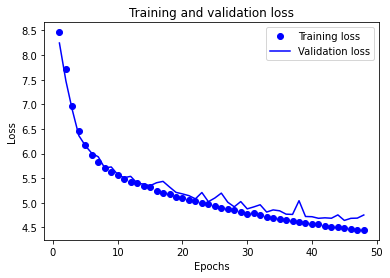

In [33]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss'][2:]
val_loss_values = history_dict['val_loss'][2:]

epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

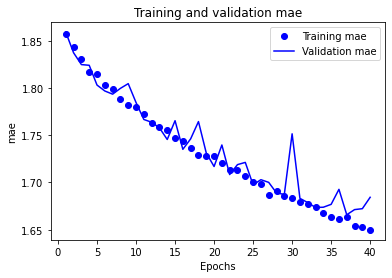

In [34]:
mae_values = history_dict['mae'][10:]
val_mae_values = history_dict['val_mae'][10:]

epochs = range(1, len(mae_values)+1)
plt.plot(epochs, mae_values, 'bo', label='Training mae')
plt.plot(epochs, val_mae_values, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()